In [16]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [17]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [18]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [19]:
X.shape , y.shape

((10000, 10), (10000,))

In [20]:
#Create dummy variables :

geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [21]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [22]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [75]:

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 30, kernel_initializer = 'he_normal',activation='relu',input_dim = 11))
classifier.add(Dropout(0.1))
# Adding the second hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'he_normal',activation='relu'))
classifier.add(Dropout(0.2))
# Adding the third hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'he_normal',activation='relu'))
classifier.add(Dropout(0.3))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


In [76]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [77]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.5932 - accuracy: 0.7401 - val_loss: 0.4991 - val_accuracy: 0.7952
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5246 - accuracy: 0.7826 - val_loss: 0.4756 - val_accuracy: 0.7952
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5008 - accuracy: 0.7908 - val_loss: 0.4616 - val_accuracy: 0.7963
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4873 - accuracy: 0.7897 - val_loss: 0.4522 - val_accuracy: 0.7974
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4717 - accuracy: 0.7934 - val_loss: 0.4460 - val_accuracy: 0.7970
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4759 - accuracy: 0.7927 - val_loss: 0.4429 - val_accuracy: 0.7978
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4647 - accuracy: 0.7996 - val_loss: 0.4396 - val_accuracy: 0.7986

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


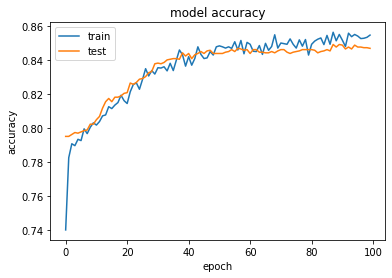

In [78]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

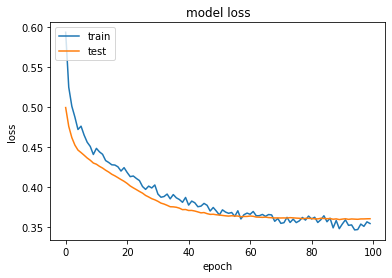

In [79]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [80]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.861